In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers for the three indices
indices = {
    'NASDAQ': '^IXIC',
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI'
}

# Fetch historical data
data = {name: yf.download(ticker, start="1995-01-01", end="2024-04-01") for name, ticker in indices.items()}

# Ensure all data is fetched
for name, df in data.items():
    if df.empty:
        print(f"Failed to fetch data for {name}")
    else:
        print(f"Data for {name} fetched successfully.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for NASDAQ fetched successfully.
Data for S&P 500 fetched successfully.
Data for Dow Jones fetched successfully.


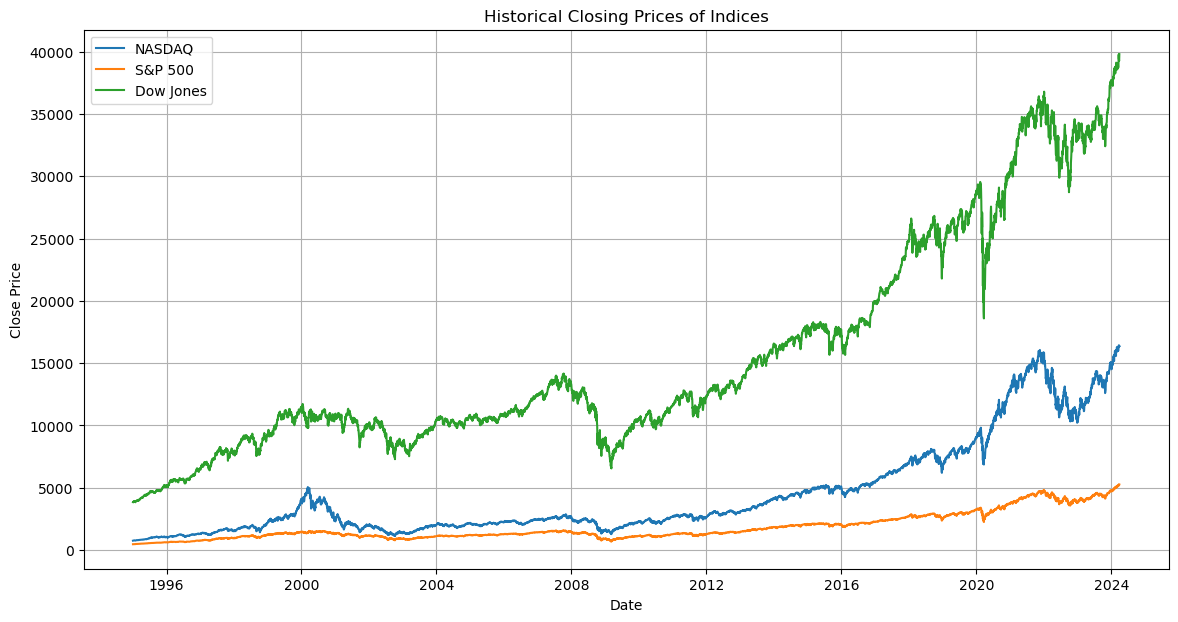

In [10]:
# Create a plot for each index
plt.figure(figsize=(14, 7))
for name, df in data.items():
    plt.plot(df['Close'], label=name)

plt.title('Historical Closing Prices of Indices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import pandas as pd
import numpy as np

def detect_sharp_changes(df, days=2, threshold=15):
    # Calculate the percentage change over the specified number of days
    df['Pct Change'] = df['Close'].pct_change(periods=days) * 100

    # Find dates where the absolute percentage change is greater than the threshold
    significant_changes = df[np.abs(df['Pct Change']) >= threshold]
    return significant_changes

In [12]:
# Define the tickers
indices = {
    'NASDAQ': '^IXIC',
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI'
}

# Parameters for change detection
days = 2
threshold = 5  # 15% rise or fall

# Fetch data and detect changes
data = {}
significant_changes = {}
for name, ticker in indices.items():
    df = yf.download(ticker, start="1995-01-01", end="2024-04-01")
    if df.empty:
        print(f"Failed to fetch data for {name}")
        continue
    print(f"Data for {name} fetched successfully.")
    data[name] = df
    significant_changes[name] = detect_sharp_changes(df, days=days, threshold=threshold)

    # Print periods of significant changes
    if not significant_changes[name].empty:
        print(f"Significant changes for {name}:", significant_changes[name][['Close', 'Pct Change']])
    else:
        print(f"No significant changes detected for {name} exceeding {threshold}% in {days} days.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Data for NASDAQ fetched successfully.
Significant changes for NASDAQ:                    Close  Pct Change
Date                                
1995-07-19    952.869995   -5.270956
1996-07-18   1109.819946    5.348987
1997-05-05   1339.239990    5.410468
1997-10-27   1532.750000   -8.287210
1998-08-27   1686.410034   -6.215208
...                  ...         ...
2022-07-28  12162.589844    5.189327
2022-10-04  11176.410156    5.680897
2022-11-03  10342.940430   -5.030913
2022-11-11  11323.330078    9.370658
2023-02-02  12200.820312    5.319762

[255 rows x 2 columns]
Data for S&P 500 fetched successfully.
Significant changes for S&P 500:                   Close  Pct Change
Date                               
1997-10-27   876.989990   -7.752265
1998-08-28  1027.140015   -5.261986
1998-08-31   957.280029   -8.182501
1998-09-14  1029.719971    5.053099
1998-10-01   986.390015   -5.970335
...                 ...         ...
2020-06-11  3002.100098   -6.394398
2022-06-10  3900.860107   -5.

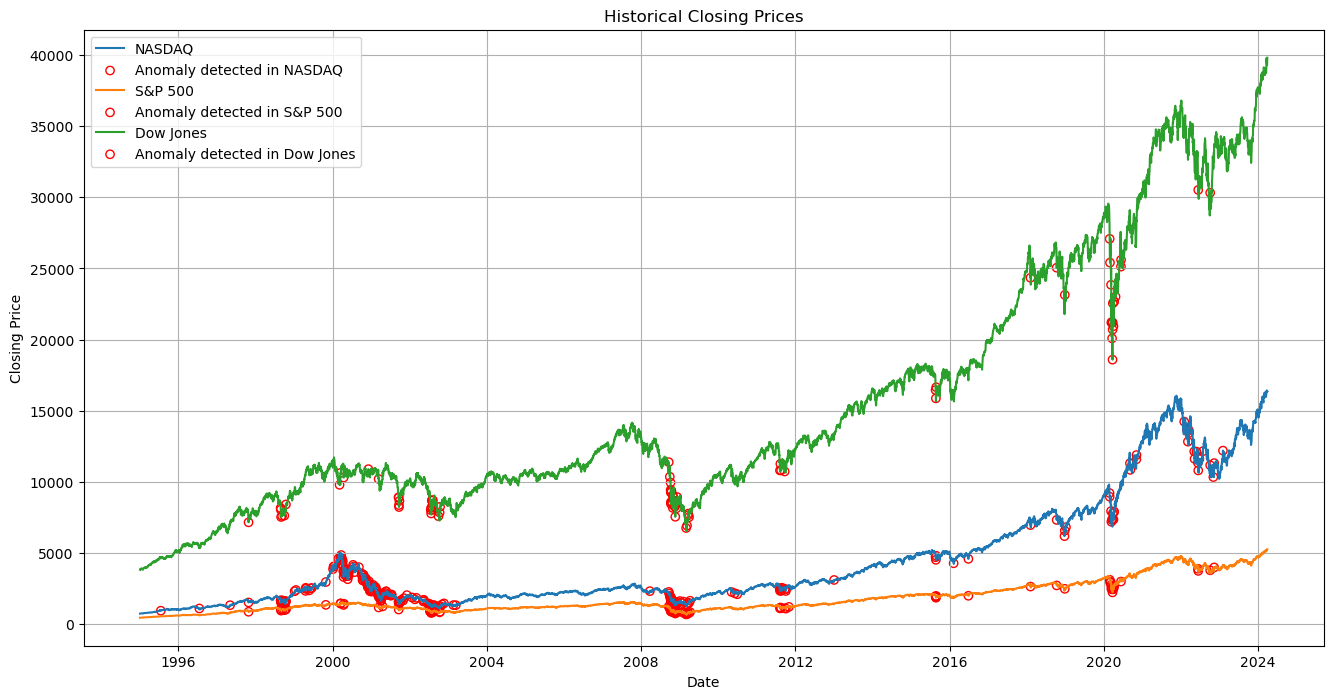

In [13]:
plt.figure(figsize=(16, 8))
for name, df in data.items():
    plt.plot(df['Close'], label=name)
    # Annotate significant changes
    if not significant_changes[name].empty:
        plt.scatter(significant_changes[name].index, significant_changes[name]['Close'], facecolors='none', edgecolors='r', label=f"Anomaly detected in {name}")

plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

April 2000 --> Dot com bubble crash 
September / October 2008 --> Wall Street - Lehman Brothers  crash 
March 2020 --> Covid 19 crash 